# Advanced Lane Finding
* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## 1. Camera Calibration 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

### Original Images:

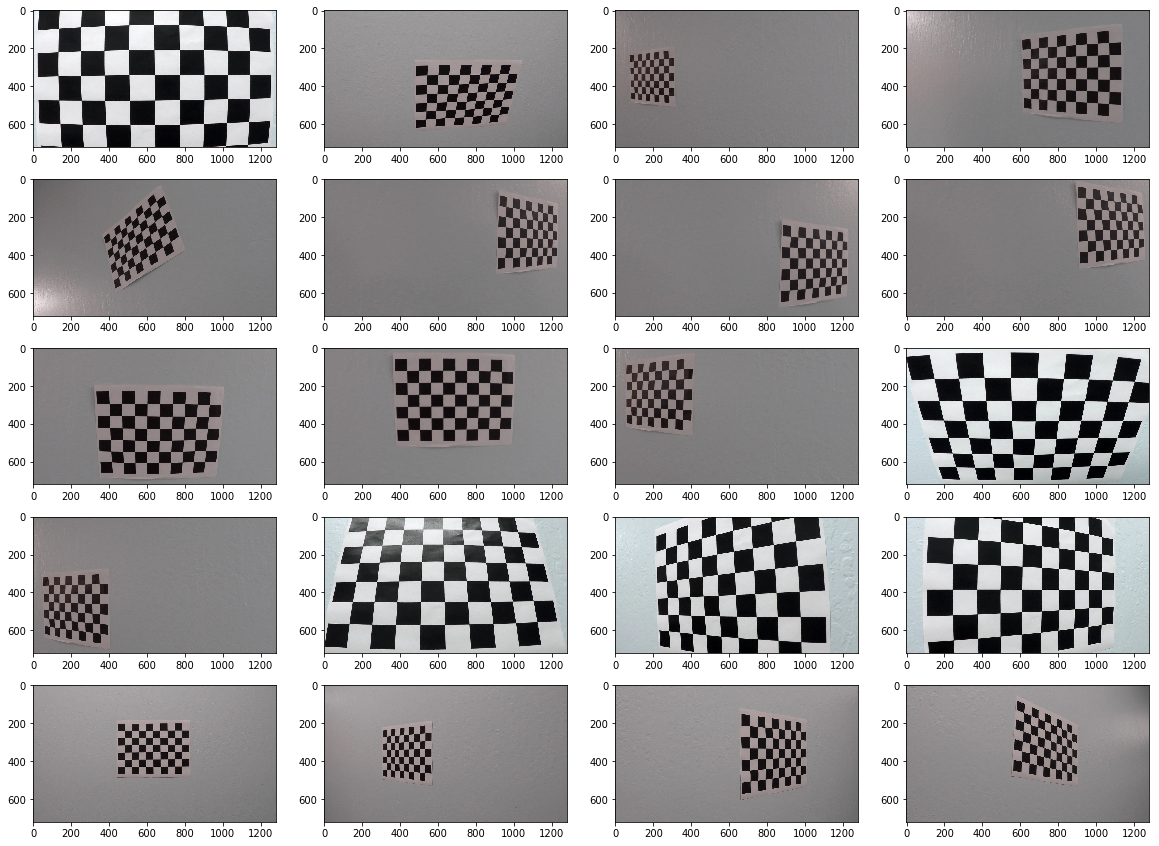

In [2]:
filelist = glob.glob('camera_cal/*.jpg')
n = len(filelist)
fig, axes = plt.subplots(5,4, figsize=(20,15))
for ax, i in zip(axes.flat, range(n)):
    ax.imshow(cv2.imread(filelist[i]))

### Get Chessboard corners

In [3]:
objpoints = []
imgpoints = []
corners_imgs = []
original_imgs = []
objp = np.zeros((6*9,3), np.float32) 
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x and y cordinates.
for file in filelist:
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        corners_img = cv2.drawChessboardCorners(img.copy(), (9, 6), corners, ret)
        corners_imgs.append(corners_img)
        original_imgs.append(img)

In [4]:
print('Number of images with corners found: {}'.format(len(corners_imgs)))

Number of images with corners found: 17


### Get Calibration Matrix and Distortion Coefficients

In [5]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, original_imgs[0].shape[1::-1], None, None)

#### Calibration Matrix:

In [6]:
print(mtx)

[[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


#### Distortion Coefficients:

In [7]:
print(dist)

[[ -2.41017956e-01  -5.30721173e-02  -1.15810355e-03  -1.28318856e-04
    2.67125290e-02]]


### Apply Distortion Correction to raw images

In [8]:
def draw_calibrated_image(index):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(original_imgs[index])
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(corners_imgs[index])
    ax2.set_title('With Corners', fontsize=30)
    ax3.imshow(cv2.undistort(original_imgs[index], mtx, dist, None, mtx))
    ax3.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Example 1

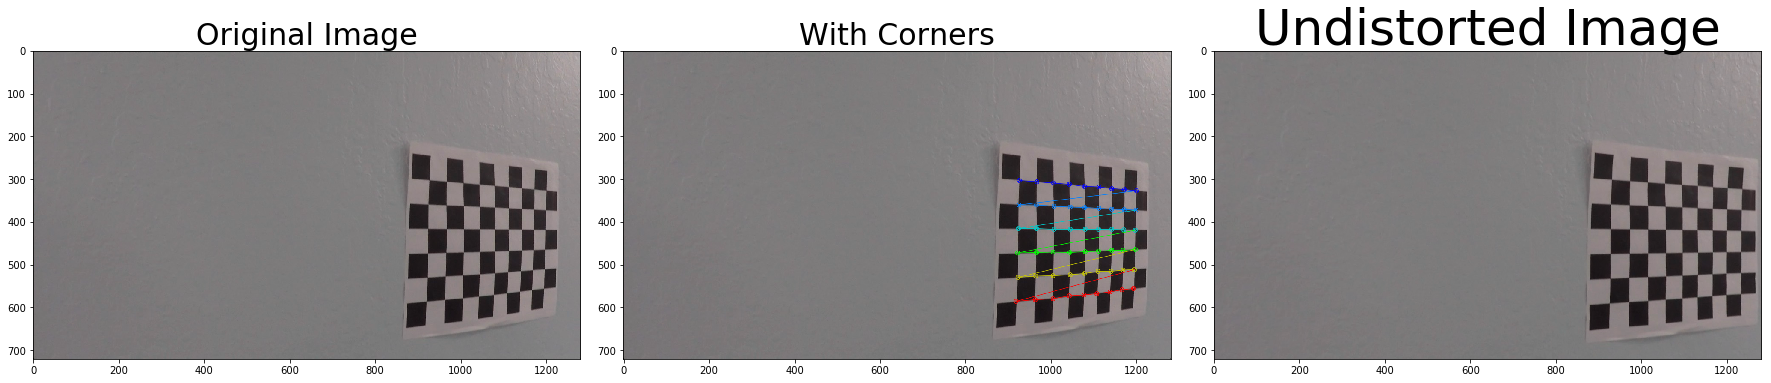

In [9]:
draw_calibrated_image(5)

### Example 2

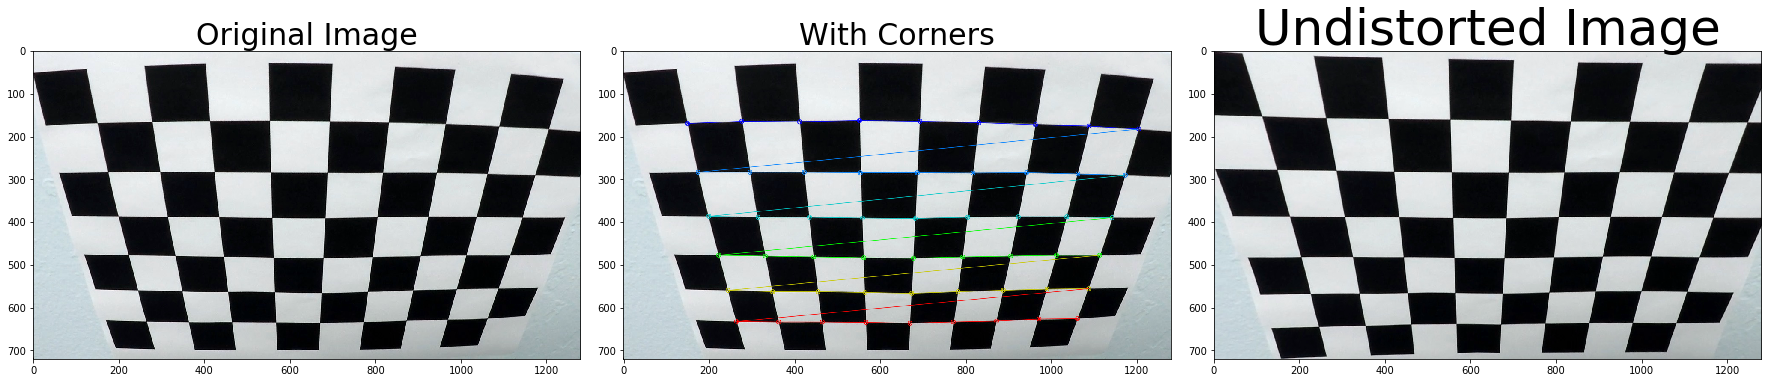

In [10]:
draw_calibrated_image(10)

### Example 3

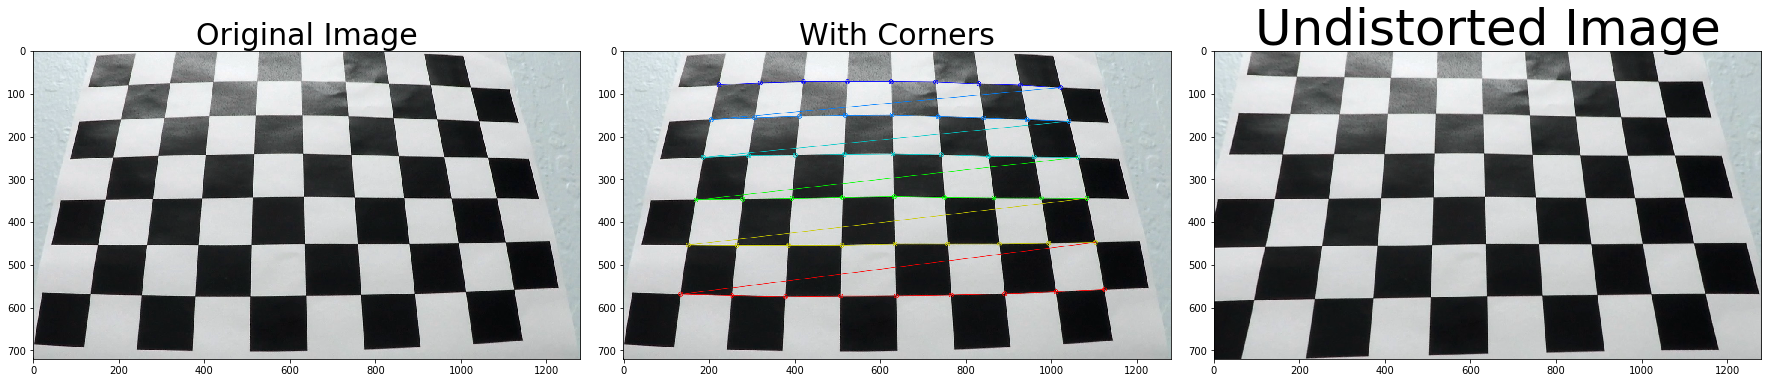

In [11]:
draw_calibrated_image(12)

## 2. Thresholded Binary Image

In [12]:
filelist = glob.glob('test_images/*.jpg')

In [13]:
def colorSobelThreshold(img, sobel_thresh = (20, 100), s_thresh = (145, 200), l_thresh = (145, 200)):
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    l_channel = hls[:,:,1]

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold sobel_x
    thresh_min = sobel_thresh[0]
    thresh_max = sobel_thresh[1]
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold s channel
    s_thresh_min = s_thresh[0]
    s_thresh_max = s_thresh[1]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    
    # Threshold l channel 
    l_thresh_min = l_thresh[0]
    l_thresh_max = l_thresh[1]
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= l_thresh_min) & (l_channel <= l_thresh_max)] = 1

    combined_binary = np.zeros_like(sxbinary)
    combined_binary[((s_binary == 1) & (l_binary == 1)) | (sxbinary == 1)] = 1
    return combined_binary

In [14]:
def draw_calibrated_image(index):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    img = plt.imread(filelist[index])
    title = filelist[index].split('/')[1]
    ax1.imshow(img)
    ax1.set_title('Original Image: ' + title, fontsize=20)
    img = cv2.undistort(img, mtx, dist, None, mtx)
    ax2.imshow(img)
    ax2.set_title('Undistorted Image', fontsize=20)
    img = colorSobelThreshold(img, sobel_thresh = (20, 100), s_thresh = (145, 200), l_thresh = (140, 255))
    ax3.imshow(img, cmap = 'gray')
    ax3.set_title('Binary Image', fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

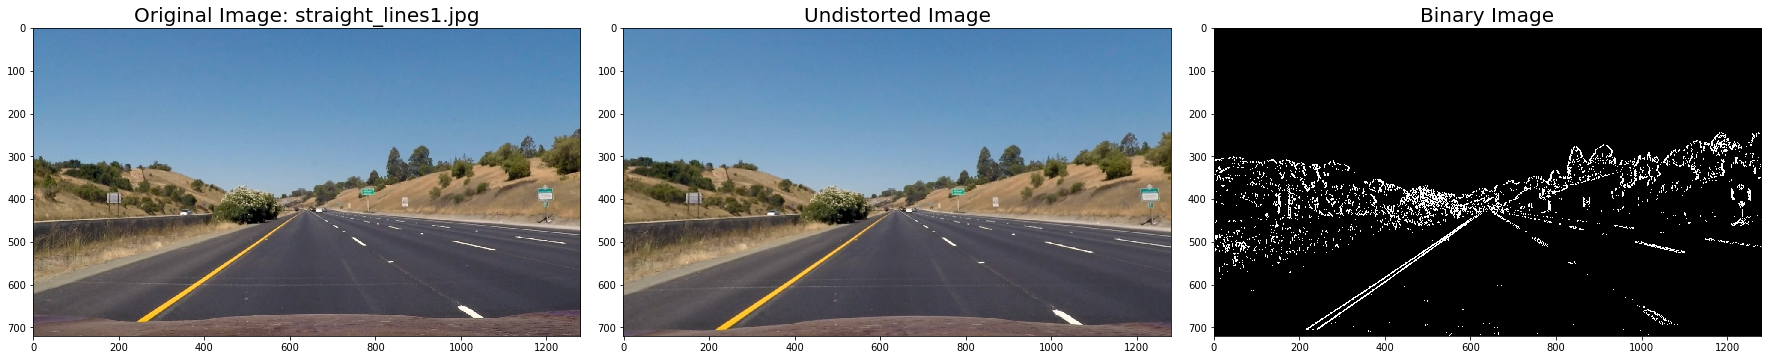

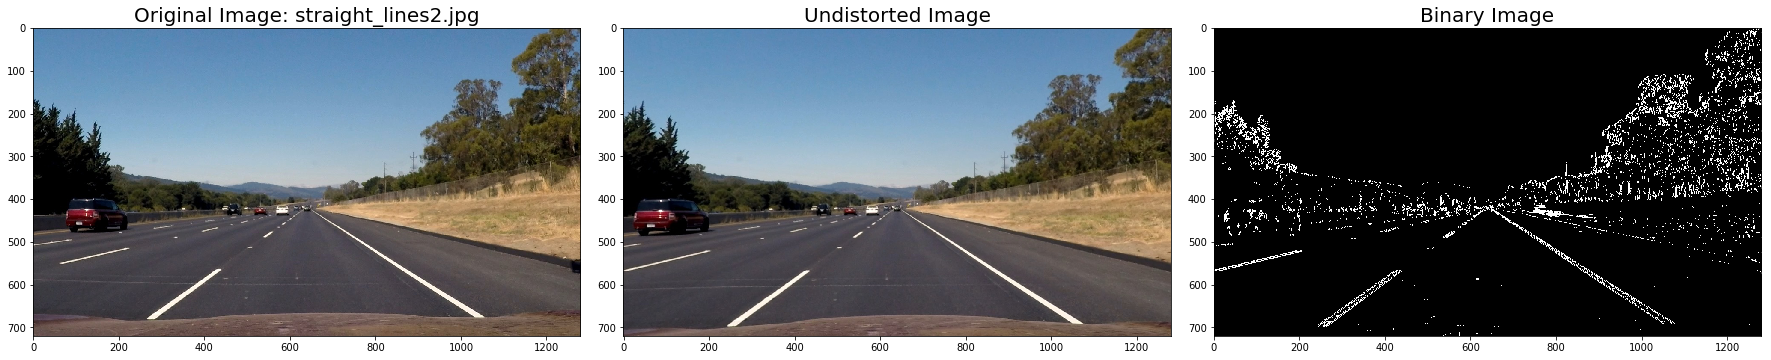

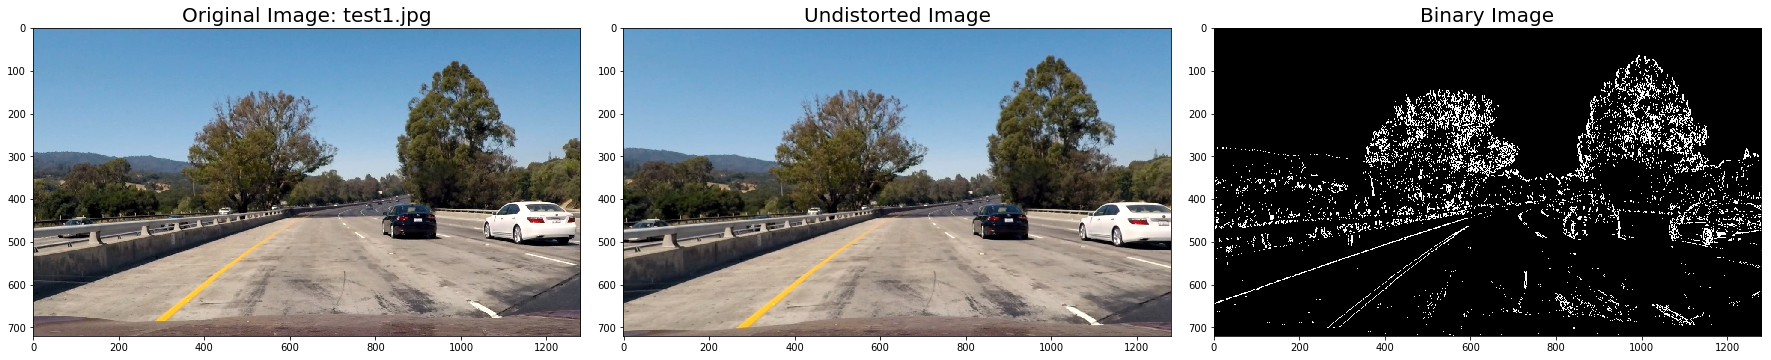

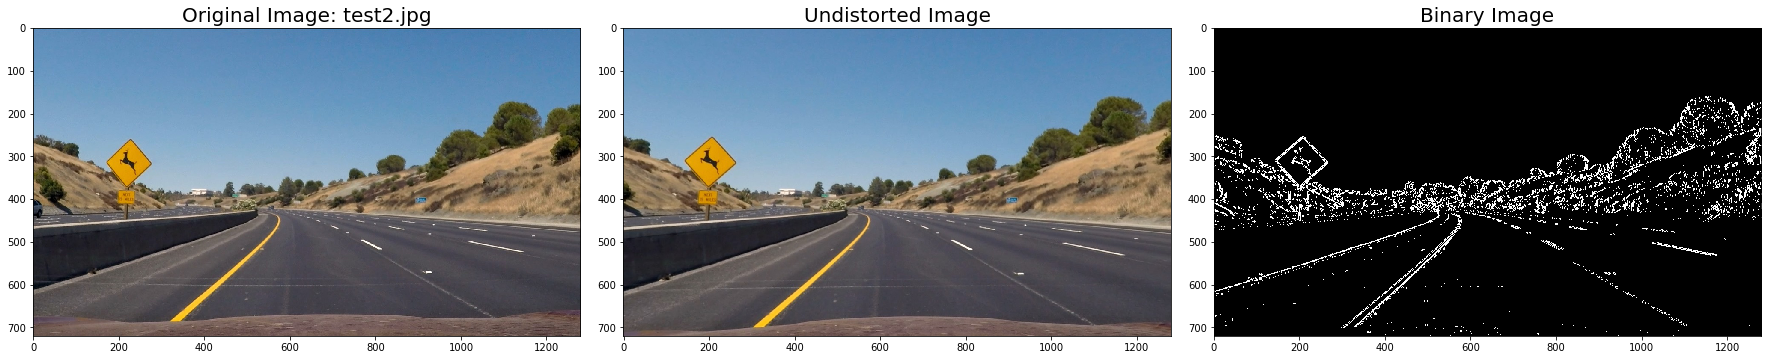

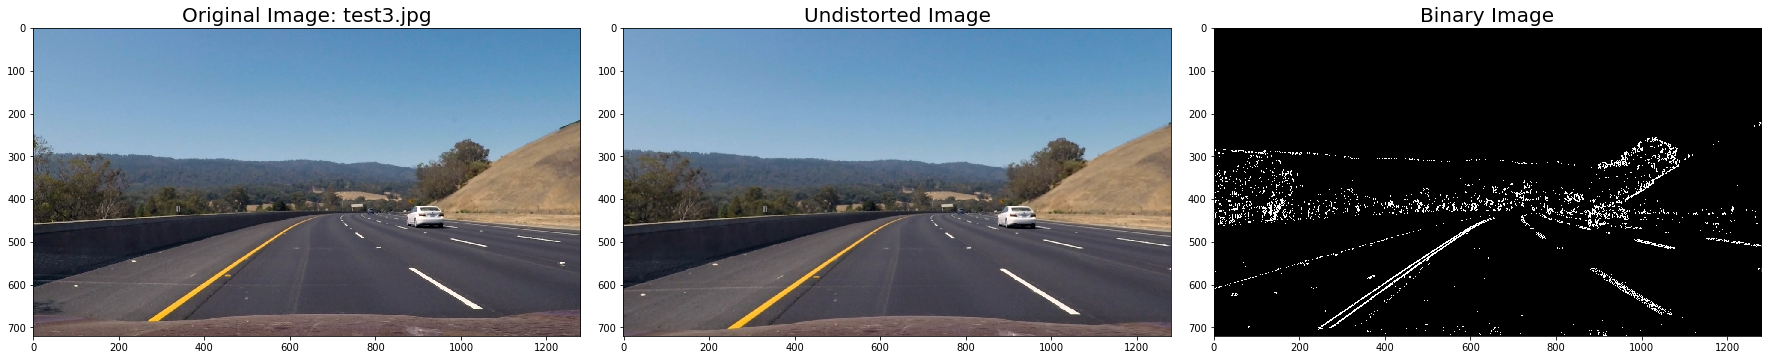

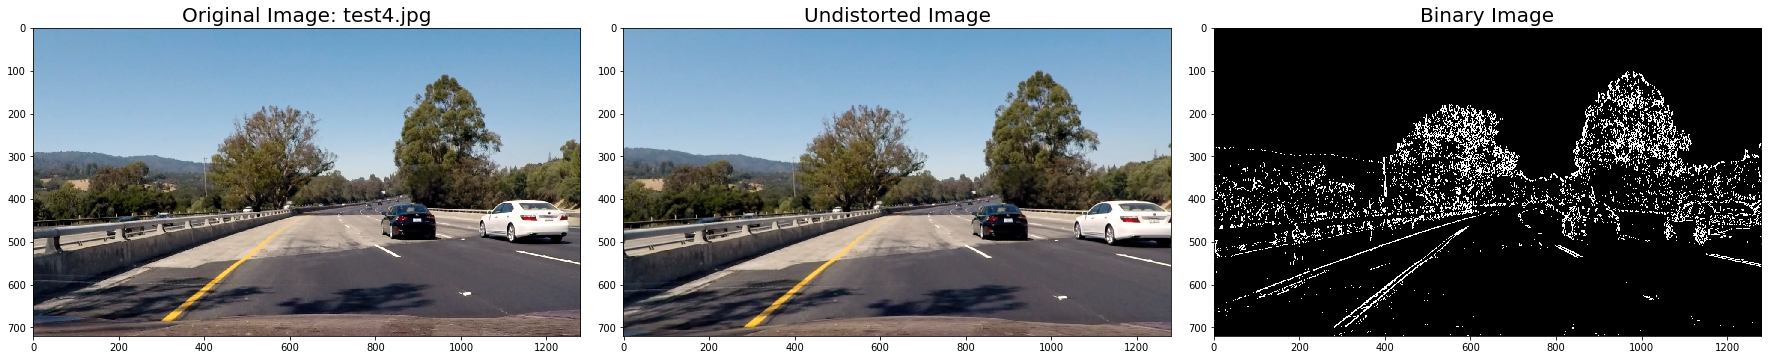

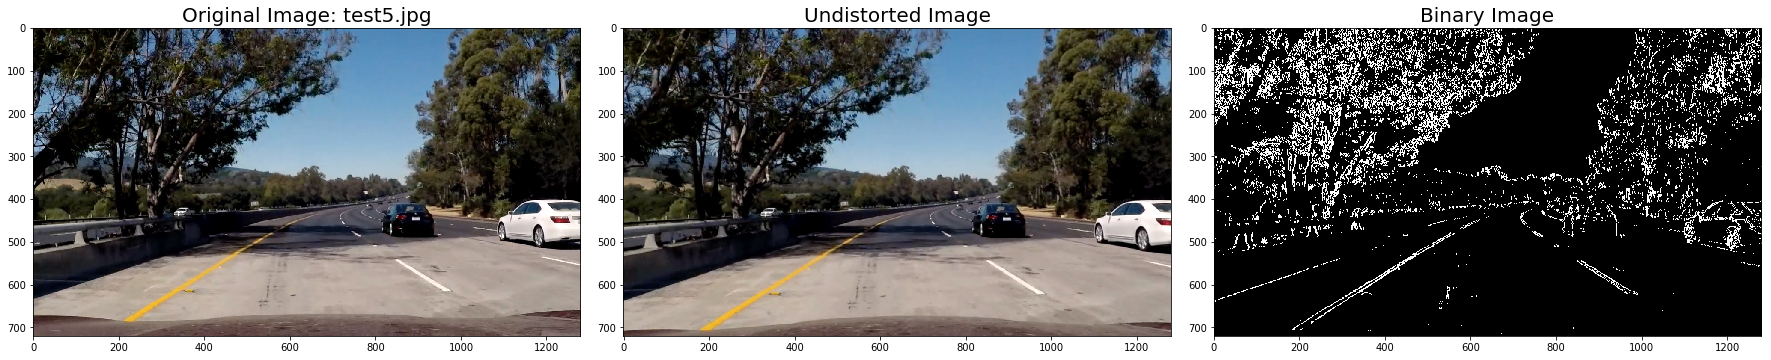

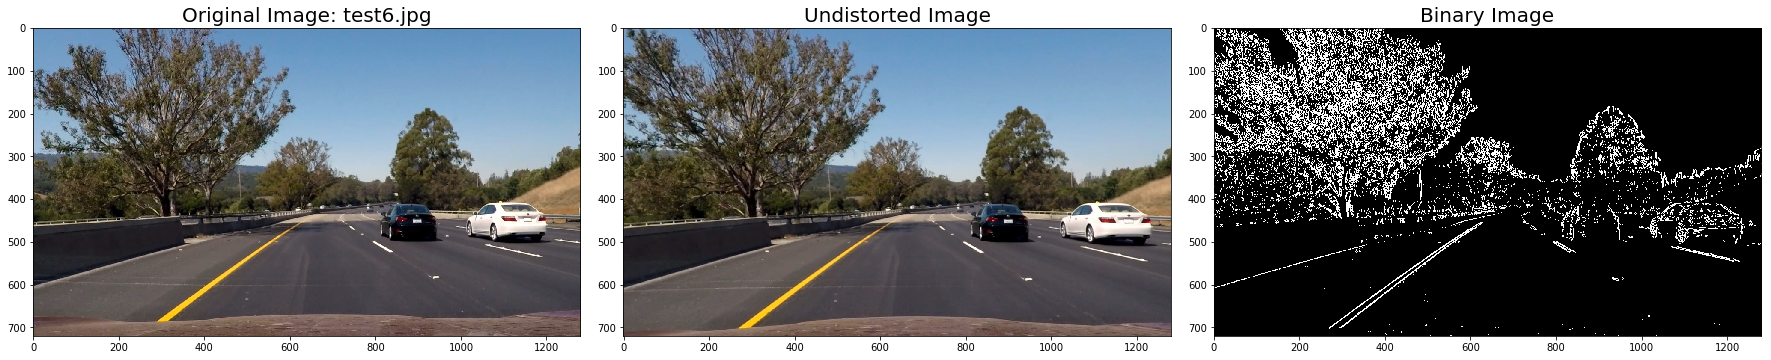

In [15]:
draw_calibrated_image(0)
draw_calibrated_image(1)
draw_calibrated_image(2)
draw_calibrated_image(3)
draw_calibrated_image(4)
draw_calibrated_image(5)
draw_calibrated_image(6)
draw_calibrated_image(7)

In [157]:
img = plt.imread(filelist[2])

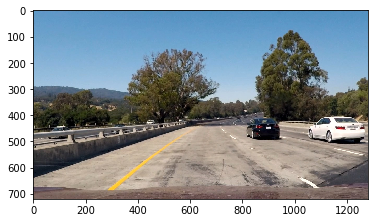

In [158]:
plt.imshow(img)

In [159]:
img = cv2.undistort(img, mtx, dist, None, mtx)

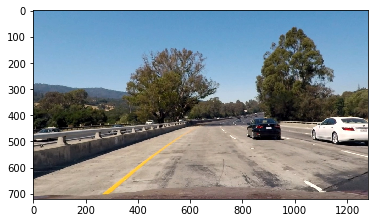

In [160]:
plt.imshow(img)

In [161]:
img_size = img.shape
img_size = (img.shape[1], img.shape[0])

In [162]:
img_size

(1280, 720)

In [163]:
src = np.float32(
    [[(img_size[0] / 2 - 55), 455],
    [210, 720],
    [1130, 720],
    [(img_size[0] / 2 + 55), 455]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

In [164]:
(img_size[0] / 2) - 55

585.0

In [165]:
M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(img, M, img_size)

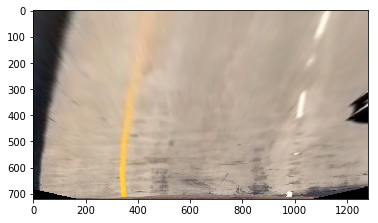

In [166]:
plt.imshow(warped)